# Aprendizaje Automático (clase 3)

## Diego Fernando Agudelo 
## Universidad ICESI 
## diegoagudelo30@gmail.com

## **1. Carga de paquetes**

#!pip list | grep numpy
#!pip install "numpy==1.26.4"
#!pip install "pmdarima==2.0.4"
!pip install "pandas"
!pip install "statsmodels"
!pip install "scikit-learn"
!pip install "matplotlib"
!pip install "seaborn"
!pip install "openpyxl"


In [2]:
#!pip install "numpy==1.26.4"
#!pip install "pmdarima==2.0.4"

In [3]:
#!pip install pmdarima
from pmdarima.arima import auto_arima
from pmdarima.utils import acf,pacf
from pmdarima.arima import ARIMA
import pandas as pd
import numpy as np 
from statsmodels.sandbox.stats.runs import runstest_1samp # prueba de rachas de Wald y Wolfowitz
import statsmodels.api as sm # prueba de Box-Pierce y la modificación de Ljung-Box
from matplotlib import pyplot as plt # gráficos 
import pylab as py
from scipy import stats
from datetime import datetime
from dateutil.relativedelta import relativedelta
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

## **2. Carga de datos**

Vamos a usar unos datos simulados de un proceso ARIMA(0,1,1)

In [4]:
data = pd.read_excel("https://raw.githubusercontent.com/profedaniel86/Series_de_Tiempo/refs/heads/main/1.Intro/datosEmpleo.xlsx",index_col='mes',parse_dates=True)
data.head()

,TD_13ciudades,Ocupados,Desocupados,Inactivos
mes,,,,
2001-01-01,20.946380,6923.604,1834.507,4600.718
2001-02-01,19.894213,7037.746,1747.820,4596.805
2001-03-01,19.221565,6945.973,1652.823,4807.120
2001-04-01,17.888575,6973.079,1519.137,4937.280
2001-05-01,17.945654,6994.462,1529.720,4928.911


data = pd.read_csv("./arima011.csv")
data.head()

## **3. ACF y PACF**

In [5]:
acf(data['Ocupados'],40)

array([1.        , 0.97855484, 0.96290943, 0.94999592, 0.93767278,
       0.92828634, 0.91803512, 0.90827078, 0.89628125, 0.88592368,
       0.8772359 , 0.8728291 , 0.86780346, 0.84936325, 0.83206921,
       0.81773834, 0.80588679, 0.79695724, 0.78708534, 0.77639894,
       0.76345987, 0.75177965, 0.74296472, 0.73663393, 0.73128083,
       0.71333785, 0.69520217, 0.68008434, 0.66685076, 0.65659735,
       0.64390143, 0.63170587, 0.6184013 , 0.60541159, 0.59596135,
       0.58936238, 0.5824738 , 0.56326155, 0.54546119, 0.53051481,
       0.51728811])

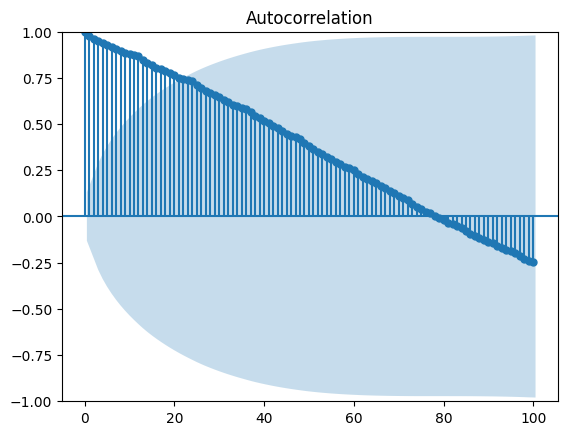

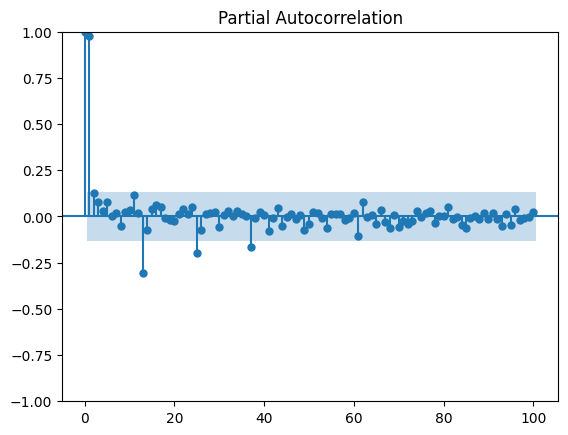

In [6]:
plot_acf(data['Ocupados'],lags=100);
plot_pacf(data['Ocupados'],lags=100);

In [7]:
## information_criterion (‘aic’, ‘aicc’, ‘bic’, ‘hqic’, ‘oob’)
model = auto_arima(data["Ocupados"],max_p=10, max_q=10,information_criterion = ("aic"))
model.summary()

d:\iProveedor\Documentos_personales\Maestria_AI\ICESI\AA3\AA3_Series_de_Tiempo\venv310\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\iProveedor\Documentos_personales\Maestria_AI\ICESI\AA3\AA3_Series_de_Tiempo\venv310\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\iProveedor\Documentos_personales\Maestria_AI\ICESI\AA3\AA3_Series_de_Tiempo\venv310\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\iProveedor\Documentos_personales\Maestria_AI\ICESI\AA3\AA3_Series_de_Tiempo\venv310\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and w

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  222
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1451.595
Date:                Thu, 04 Dec 2025   AIC                           2911.190
Time:                        22:26:41   BIC                           2924.782
Sample:                    01-01-2001   HQIC                          2916.678
                         - 06-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      9.8551      2.485      3.965      0.000       4.984      14.726
ar.L1          0.4419      0.101      4.357      0.000       0.243       0.641
ma.L1         -0.8618      0.053    -16.414      0.000      -0.965      -0.759
sigma2      2.948e+04   2480.399     11.885      0.000    2.46e+04    3.43e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                57.86
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               1.29   Skew:                            -0.99
Prob(H) (two-sided):                  0.28   Kurtosis:                         4.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
print(model.resid())

mes
2001-01-01    6905.945664
2001-02-01     159.981701
2001-03-01     -38.696295
2001-04-01      28.345016
2001-05-01      22.031179
                 ...     
2019-02-01     -33.944117
2019-03-01      56.155415
2019-04-01    -179.849546
2019-05-01      73.008212
2019-06-01       8.094891
Length: 222, dtype: float64


<Axes: xlabel='mes'>

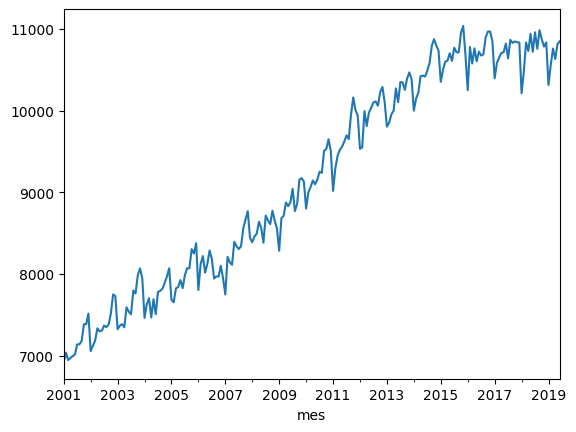

In [9]:
data['Ocupados'].plot()

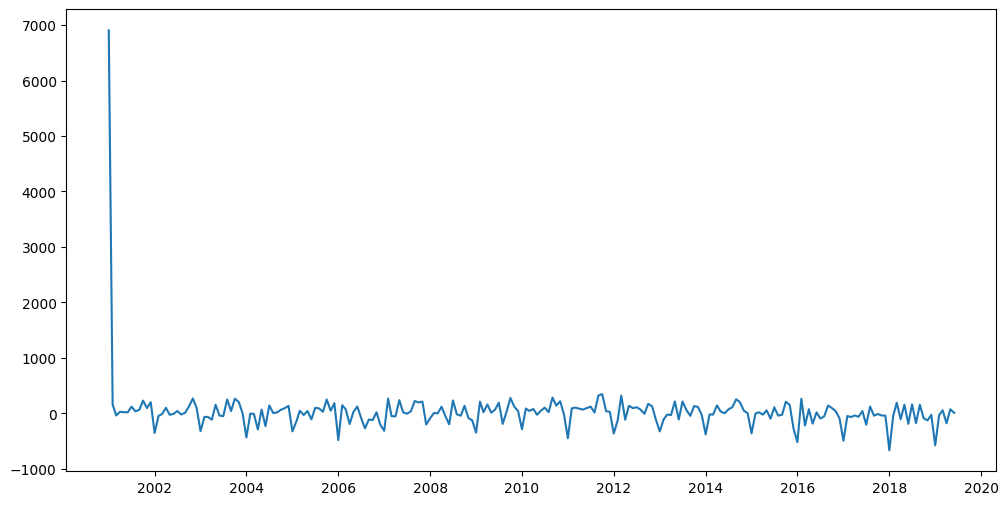

In [10]:
fig = plt.figure(figsize=(12, 6))
plt.plot(model.resid(),label="Residuales")

### Debido a qque el primer registro no tiene como compararse con datos anteriores, el sistema rellena los datos con valores simulados.
Se decide graficar sin el primer registro de los residuos.

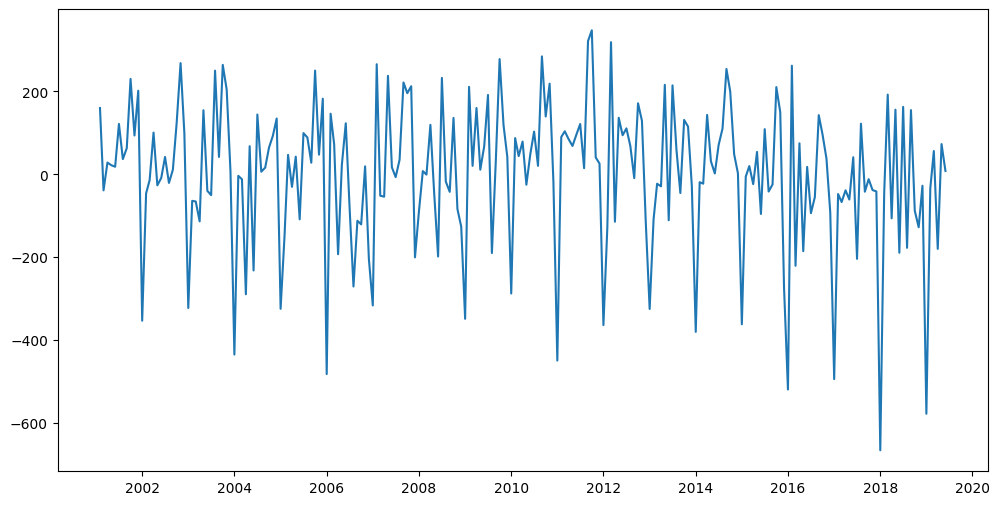

In [11]:
fig = plt.figure(figsize=(12, 6))
plt.plot(model.resid()[1:],label="Residuales")

## **4. Pronóstico del ARIMA(0,1,1) obtenido en el auto.arima**


d:\iProveedor\Documentos_personales\Maestria_AI\ICESI\AA3\AA3_Series_de_Tiempo\venv310\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\iProveedor\Documentos_personales\Maestria_AI\ICESI\AA3\AA3_Series_de_Tiempo\venv310\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


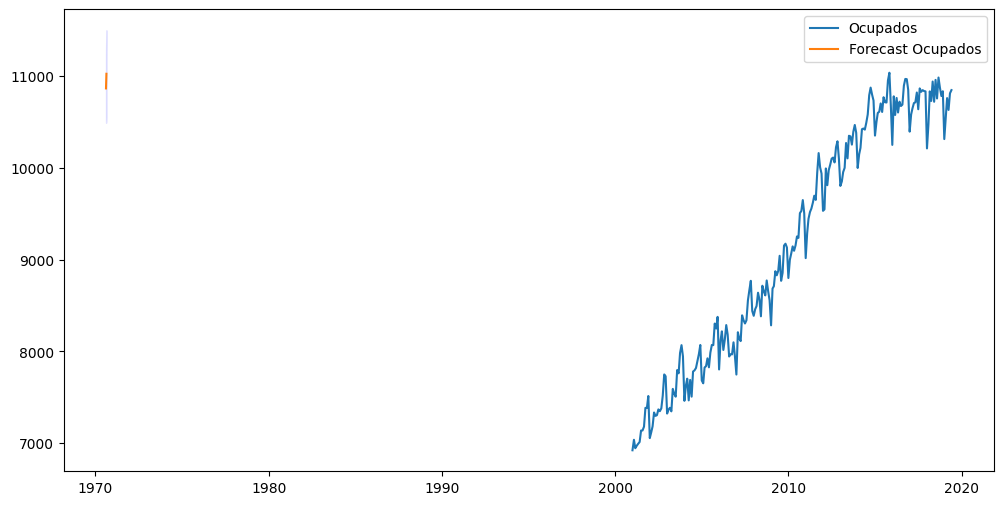

In [12]:
h=10

y_forec, conf_int  = model.predict(h,return_conf_int=True,alpha=0.05)
preds = pd.DataFrame(np.column_stack([y_forec,conf_int[:,0] , conf_int[:,1]]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']

x_for= np.linspace((data.shape[0]+1),(data.shape[0]+h),h)

fig = plt.figure(figsize=(12, 6))
plt.plot(data.index,data["Ocupados"],label="Ocupados")
plt.plot(x_for,preds['Point_forecast'],label="Forecast Ocupados")
plt.fill_between(x_for,preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)
plt.legend()
plt.show()


## **5. Replicando el modelo sin hacer auto arima**

In [13]:
model = ARIMA(order=(0,1,1))
results = model.fit( data["ARIMA011"])
results.summary()

KeyError: 'ARIMA011'

## **6. Intervalos de confianza usando boostrap**


In [ ]:
h= 10
res = results.resid()

my_samples = []
for _ in range(1000):

    x = np.random.choice(res, size=h, replace=True)
    my_samples.append(x)

q1=np.quantile(my_samples,0.025,axis=0)
q2=np.quantile(my_samples,0.975,axis=0) 

fore = results.predict(h,return_conf_int=False)

preds = pd.DataFrame(np.column_stack([fore,fore+np.cumsum(q1) , fore+np.cumsum(q2)]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']

preds


In [ ]:
x_for= np.linspace((data.shape[0]+1),(data.shape[0]+h),h)

fig = plt.figure(figsize=(12, 6))
plt.plot(data["time"],data["ARIMA011"],label="ARIMA011")
plt.plot(x_for,preds['Point_forecast'],label="Forecast Boostrap")
plt.fill_between(x_for,preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)
plt.legend()
plt.show()

### **7. Ejercicio en Clase**

Empleando la información del número de ocupados en miles de personas (Ocupados) para las 13 principales ciudades, encuentre el mejor pronóstico para los próximos 6 meses empleando los métodos vistos en la clase. Compare
los resultados con el mejor modelo encontrado en el ejercicio anterior. 

Escriba un breve informe de máximo una página de texto que explique cómo llega a sus proyeccciones y presente las proyecciones. Aclare en el texto cuáles serían las limitaciones de sus pronósticos.